### Example script for running the basic IBS implementation
We use data generated from simple discrimination orientation model and calculate its log-likelihood using IBS.
Because the analytical log-likelihood of this model is available, one can compare the results and verify the unbiasdness of the IBS estimator.

In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from ibs_simple import ibs_basic
from psycho_gen import psycho_gen
from psycho_nll import psycho_nll

In [5]:
# Generate simulated dataset

Ntrials = 600
eta = np.log(1)  # Fake subject (log) sensory noise
bias = 0.2  # Fake subject response bias
lapse = 0.03  # Fake subject lapse rate
# Generating parameter vector
theta_true = np.array([eta, bias, lapse])

# Generate stimulus orientation per trial
S = 3 * npr.rand(Ntrials)

# Generate fake subject responses
R = psycho_gen(theta_true, S)

In [6]:
# Comparing estimated result to true value
print("exact log-likelihood:", -psycho_nll(theta_true, S, R))
print("log-likelihood obtained with IBS:", ibs_basic(psycho_gen, theta_true, R, S))

exact log-likelihood: -205.03274671128028
log-likelihood obtained with IBS: -190.26943332711636


I want to check the unbiasedness of the estimator by demonstrating that the log-likelihood estimates are centred on the true value.
The bias function calculates 1000 log-likelihood estimates and returns an array with the difference between the estimates and the true value. A histogram of these estimates is then plotted. It can be seen that the distribution is centred around 0 and approximately Gaussian.

In [7]:
def bias(Ntrials, theta, nreps=1000):
    """Retrun the bias of the IBS estimator

    Inputs:
    Ntrials: int
        number of trials for which to calculate the bias of the IBS estimator
    theta: np.array with 3 elements
        model parameter vector, with theta(0) as eta=log(sigma), the log of the sensory noise,
        theta(1) as the bias term,
        theta(2) as the lapse rate
    nreps: int, optional
        number of repetitions to calculate the bias

    Returns:
    b: np.array
        bias (estimate - true value) of the IBS estimator
        vector of length nreps
    """

    # Generate stimulus orientation per trial
    S = 3 * npr.rand(Ntrials)
    R = psycho_gen(theta, S)
    # Calculate bias = estimate - true value
    b = np.zeros(nreps)
    for i in range(nreps):
        L = psycho_nll(theta, S, R)
        b[i] = L + ibs_basic(psycho_gen, theta, R, S)
    return b

The mean of the bias is -0.04159362353272962


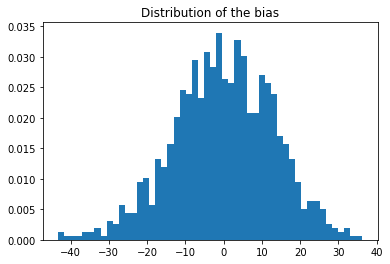

In [8]:
b = bias(Ntrials, theta_true)
plt.hist(b, bins=50, density=True)
plt.title("Distribution of the bias")
print("The mean of the bias is", np.mean(b))